In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [34]:
iris_data = pd.read_csv('/content/iris_data.csv')

In [35]:
iris_data.shape

(150, 6)

In [36]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
iris_data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [38]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


stemming
process of reduce a word to it's root word  

In [39]:
iris_data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [40]:
labelencode=LabelEncoder()

In [41]:
lables=labelencode.fit_transform(iris_data.Species)

appending the labels to the dataframe

In [42]:
iris_data['Species']=lables

In [43]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [44]:
x=iris_data.drop(columns='Species',axis=1)
y=iris_data['Species']

In [45]:
print(x,y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


splitting the data to train and test data

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(150, 5) (120, 5) (30, 5)


fit the mpdel

In [48]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=clf.predict(x_test)

In [51]:
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Precision is: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall is: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 score is: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [52]:
import six
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

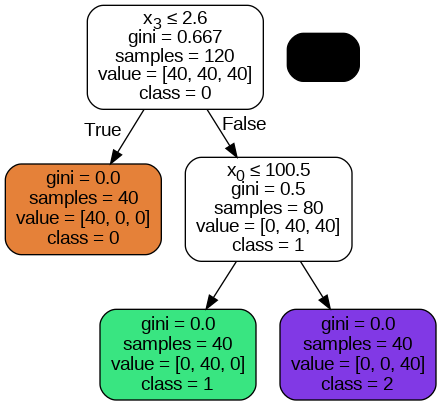

In [53]:
class_names = [str(cls) for cls in clf.classes_]

# Generate DOT data
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    class_names=class_names,
)

# Convert DOT to graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save and display the graph
graph.write_png('diabetes.png')
Image(graph.create_png())

In [55]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred) )

Accuracy: 1.0


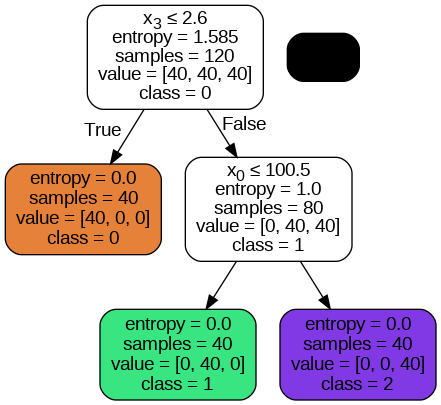

In [56]:
class_names = [str(cls) for cls in clf.classes_]

# Generate DOT data
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    class_names=class_names,
)

# Convert DOT to graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save and display the graph
graph.write_png('diabetes.png')
Image(graph.create_png())